1. Montare Google Drive si setarea Directoarelor

In [ ]:
# 1. Montare Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Setare directoare proiect
import os

PROJECT_DIR = '/content/drive/MyDrive/AI_generare_muzica'
FMA_DIR = os.path.join(PROJECT_DIR, 'data/fma_small')
META_DIR = os.path.join(PROJECT_DIR, 'data/fma_metadata')
DATA_DIR = os.path.join(PROJECT_DIR, 'data/processed')
MODEL_DIR = os.path.join(PROJECT_DIR, 'models')
OUTPUT_DIR = os.path.join(PROJECT_DIR, 'outputs')

# Cream directoarele daca nu exista
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("Directoarele au fost pregatite.")


Mounted at /content/drive
Directoarele au fost pregatite.


2. Preprocesare: extragere MFCC și salvare

In [ ]:
#  Preprocesare MFCC
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

# Parametri MFCC
SAMPLE_RATE = 22050
N_MFCC = 40
MAX_LEN = 500

# Functie pentru incarcare metadata
def load_metadata():
    tracks = pd.read_csv(os.path.join(META_DIR, 'tracks.csv'), index_col=0, header=[0, 1])
    return tracks

# Functie pentru extragere MFCC
def extract_mfcc(file_path):
    try:
        y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
        mfcc = mfcc.T
        if mfcc.shape[0] < MAX_LEN:
            pad_width = MAX_LEN - mfcc.shape[0]
            mfcc = np.pad(mfcc, ((0, pad_width), (0, 0)))
        else:
            mfcc = mfcc[:MAX_LEN]
        return mfcc
    except Exception as e:
        print(f"Eroare la {file_path}: {e}")
        return None

# Procesare fisiere audio
print("Incep prelucrarea fisierelor audio...")

tracks = load_metadata()
small_tracks = tracks['set']['subset'] == 'small'
track_ids = tracks[small_tracks].index

genre_labels = tracks['track']['genre_top'].loc[track_ids]
genre_labels = genre_labels.dropna()

unique_genres = sorted(genre_labels.unique())
genre_to_index = {genre: i for i, genre in enumerate(unique_genres)}

mfcc_data = []
labels = []

for track_id in tqdm(genre_labels.index):
    genre = genre_labels.loc[track_id]
    genre_index = genre_to_index[genre]

    filename = f"{track_id:06d}.mp3"
    folder = filename[:3]
    file_path = os.path.join(FMA_DIR, folder, filename)

    if not os.path.exists(file_path):
        continue

    mfcc = extract_mfcc(file_path)
    if mfcc is not None:
        mfcc_data.append(mfcc)
        labels.append(genre_index)

# Transformam listele in numpy array
mfcc_data = np.array(mfcc_data)
labels = np.array(labels)

# One-hot encoding pentru genuri
one_hot_labels = np.zeros((labels.size, len(unique_genres)))
one_hot_labels[np.arange(labels.size), labels] = 1

# Salvam datele procesate
np.save(os.path.join(DATA_DIR, 'mfcc_data.npy'), mfcc_data)
np.save(os.path.join(DATA_DIR, 'labels.npy'), one_hot_labels)
np.save(os.path.join(DATA_DIR, 'label_names.npy'), np.array(unique_genres))

print("Preprocesarea s-a terminat cu succes. Datele au fost salvate.")


Incep prelucrarea fisierelor audio...


 55%|█████▌    | 4423/8000 [1:17:13<56:47,  1.05it/s]<ipython-input-2-959e13fd0b83>:20: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 55%|█████▌    | 4424/8000 [1:17:15<1:15:34,  1.27s/it]<ipython-input-2-959e13fd0b83>:20: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 55%|█████▌    | 4425/8000 [1:17:16<1:04:26,  1.08s/it]<ipython-in

Eroare la /content/drive/MyDrive/AI_generare_muzica/data/fma_small/099/099134.mp3: 


 61%|██████▏   | 4903/8000 [1:24:55<48:34,  1.06it/s]<ipython-input-2-959e13fd0b83>:20: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 61%|██████▏   | 4904/8000 [1:24:55<44:46,  1.15it/s]

Eroare la /content/drive/MyDrive/AI_generare_muzica/data/fma_small/108/108925.mp3: 


 87%|████████▋ | 6965/8000 [1:59:53<14:53,  1.16it/s]<ipython-input-2-959e13fd0b83>:20: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 87%|████████▋ | 6966/8000 [1:59:54<16:25,  1.05it/s]

Eroare la /content/drive/MyDrive/AI_generare_muzica/data/fma_small/133/133297.mp3: 


100%|██████████| 8000/8000 [2:16:19<00:00,  1.02s/it]


Preprocesarea s-a terminat cu succes. Datele au fost salvate.


# 3. Antrenare clasificator genuri (CNN + LSTM)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# Încarcă datele procesate
X = np.load(os.path.join(DATA_DIR, 'mfcc_data.npy'))
y = np.load(os.path.join(DATA_DIR, 'labels.npy'))

# Împărțire train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creează modelul
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y.shape[1], activation='softmax')
])

# Compilează modelul
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Callback-uri pentru salvare și oprire timpurie
checkpoint = ModelCheckpoint(os.path.join(MODEL_DIR, 'genre_classifier.h5'), monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)


# Antrenare
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=64,
    callbacks=[checkpoint, early_stop]
)

print("Modelul de clasificare a genurilor a fost antrenat cu succes!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 498, 64)        │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 498, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 249, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 249, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,704 (178.53 KB)

 Trainable params: 45,576 (178.03 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.2273 - loss: 1.9984

100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 298ms/step - accuracy: 0.2276 - loss: 1.9978 - val_accuracy: 0.2925 - val_loss: 1.8310
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.3158 - loss: 1.8045

100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.3159 - loss: 1.8044 - val_accuracy: 0.3237 - val_loss: 1.7494
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.3613 - loss: 1.7255

100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 290ms/step - accuracy: 0.3613 - loss: 1.7254 - val_accuracy: 0.3644 - val_loss: 1.6853
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 274ms/step - accuracy: 0.3969 - loss: 1.6565 - val_accuracy: 0.3587 - val_loss: 1.7081
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.3871 - loss: 1.6625

100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 270ms/step - accuracy: 0.3872 - loss: 1.6624 - val_accuracy: 0.3919 - val_loss: 1.7027
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.4080 - loss: 1.6284

100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 279ms/step - accuracy: 0.4080 - loss: 1.6283 - val_accuracy: 0.4025 - val_loss: 1.6467
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.4310 - loss: 1.5811

100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 273ms/step - accuracy: 0.4309 - loss: 1.5812 - val_accuracy: 0.4119 - val_loss: 1.6366
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - accuracy: 0.4500 - loss: 1.5362 - val_accuracy: 0.3988 - val_loss: 1.6587
Epoch 9/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.4549 - loss: 1.5341

100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 288ms/step - accuracy: 0.4549 - loss: 1.5341 - val_accuracy: 0.4137 - val_loss: 1.6237
Epoch 10/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.4652 - loss: 1.5009

100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - accuracy: 0.4651 - loss: 1.5011 - val_accuracy: 0.4500 - val_loss: 1.5832
Epoch 11/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 310ms/step - accuracy: 0.4750 - loss: 1.4671 - val_accuracy: 0.4338 - val_loss: 1.5806
Epoch 12/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 283ms/step - accuracy: 0.4904 - loss: 1.4531 - val_accuracy: 0.4363 - val_loss: 1.6015
Epoch 13/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 268ms/step - accuracy: 0.4773 - loss: 1.4645 - val_accuracy: 0.4456 - val_loss: 1.5793
Epoch 14/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 274ms/step - accuracy: 0.4825 - loss: 1.4591 - val_accuracy: 0.4263 - val_loss: 1.6385
Epoch 15/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 263ms/step - accuracy: 0.4992 - loss: 1.4328 - val_accuracy: 0.4456 - val_loss: 1.5965
Epoch 16/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 308ms/step - accuracy: 0.5136 - loss: 1.3942 - val_accuracy: 0.4444 - val_loss: 1.5914
Epoch 17/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 274ms/step - accuracy: 0.4942 - loss

100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 275ms/step - accuracy: 0.4986 - loss: 1.4190 - val_accuracy: 0.4538 - val_loss: 1.5842
Epoch 20/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.5328 - loss: 1.3318

100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.5327 - loss: 1.3319 - val_accuracy: 0.4694 - val_loss: 1.5775
Epoch 21/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 275ms/step - accuracy: 0.5348 - loss: 1.3163 - val_accuracy: 0.4187 - val_loss: 1.6486
Epoch 22/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 275ms/step - accuracy: 0.5307 - loss: 1.3490 - val_accuracy: 0.4644 - val_loss: 1.5751
Epoch 23/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - accuracy: 0.5416 - loss: 1.3005 - val_accuracy: 0.4419 - val_loss: 1.6490
Epoch 24/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 268ms/step - accuracy: 0.5549 - loss: 1.2852 - val_accuracy: 0.4619 - val_loss: 1.6046
Epoch 25/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 278ms/step - accuracy: 0.5546 - loss: 1.2789 - val_accuracy: 0.4588 - val_loss: 1.5816
Epoch 26/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.5620 - loss: 1.2463

100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 301ms/step - accuracy: 0.5620 - loss: 1.2464 - val_accuracy: 0.4794 - val_loss: 1.5630
Epoch 27/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 267ms/step - accuracy: 0.5700 - loss: 1.2410 - val_accuracy: 0.4731 - val_loss: 1.5928
Epoch 28/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 279ms/step - accuracy: 0.5691 - loss: 1.2116 - val_accuracy: 0.4731 - val_loss: 1.5952
Epoch 29/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 267ms/step - accuracy: 0.5820 - loss: 1.2036 - val_accuracy: 0.4487 - val_loss: 1.6438
Epoch 30/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 265ms/step - accuracy: 0.5660 - loss: 1.2084 - val_accuracy: 0.4575 - val_loss: 1.6758
Epoch 31/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 268ms/step - accuracy: 0.5678 - loss: 1.2234 - val_accuracy: 0.4563 - val_loss: 1.6570
Epoch 32/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 309ms/step - accuracy: 0.5808 - loss: 1.2009 - val_accuracy: 0.4619 - val_loss: 1.6209
Epoch 33/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 268ms/step - accuracy: 0.5852 - loss

100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 275ms/step - accuracy: 0.6230 - loss: 1.0761 - val_accuracy: 0.4850 - val_loss: 1.6134
Epoch 41/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - accuracy: 0.6328 - loss: 1.0427 - val_accuracy: 0.4731 - val_loss: 1.6647
Epoch 42/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - accuracy: 0.6149 - loss: 1.0740 - val_accuracy: 0.4663 - val_loss: 1.6915
Epoch 43/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.6132 - loss: 1.0935 - val_accuracy: 0.4625 - val_loss: 1.6668
Epoch 44/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 284ms/step - accuracy: 0.5906 - loss: 1.1632 - val_accuracy: 0.4725 - val_loss: 1.6363
Epoch 45/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 277ms/step - accuracy: 0.6065 - loss: 1.0979 - val_accuracy: 0.4681 - val_loss: 1.6811
Epoch 46/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 268ms/step - accuracy: 0.6163 - loss: 1.1102 - val_accuracy: 0.4744 - val_loss: 1.6872
Epoch 47/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.6418 - loss:

100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 288ms/step - accuracy: 0.6417 - loss: 1.0375 - val_accuracy: 0.4863 - val_loss: 1.6749
Epoch 48/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 279ms/step - accuracy: 0.6247 - loss: 1.0569 - val_accuracy: 0.4575 - val_loss: 1.8472
Epoch 49/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 294ms/step - accuracy: 0.6214 - loss: 1.0987 - val_accuracy: 0.4737 - val_loss: 1.7074
Epoch 50/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 265ms/step - accuracy: 0.6294 - loss: 1.0513 - val_accuracy: 0.4819 - val_loss: 1.7006
Epoch 51/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 278ms/step - accuracy: 0.6453 - loss: 1.0231 - val_accuracy: 0.4725 - val_loss: 1.7111
Epoch 52/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 275ms/step - accuracy: 0.6462 - loss: 0.9933 - val_accuracy: 0.4737 - val_loss: 1.7500
Epoch 53/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 263ms/step - accuracy: 0.6613 - loss: 0.9741 - val_accuracy: 0.4550 - val_loss: 1.8061
Epoch 54/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 276ms/step - accuracy: 0.6293 - loss

4. Antrenare generator muzical (RNN simplificat)

In [ ]:
import numpy as np
import os
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Setari directoare
PROJECT_DIR = '/content/drive/MyDrive/AI_generare_muzica'
DATA_DIR = os.path.join(PROJECT_DIR, 'data/processed')
MODEL_DIR = os.path.join(PROJECT_DIR, 'models')

# Incarcare date
X = np.load(os.path.join(DATA_DIR, 'mfcc_data.npy'))
y = np.load(os.path.join(DATA_DIR, 'labels.npy'))

# Normalizare MFCC
X = (X - np.mean(X)) / np.std(X)

# Limitam pentru stabilitate in Colab
X = X[:1000]
y = y[:1000]

SEQ_LENGTH = 30
X_seq = []
y_seq = []

for i in range(len(X)):
    if X[i].shape[0] < SEQ_LENGTH + 1:
        continue
    for j in range(X[i].shape[0] - SEQ_LENGTH - 1):
        seq_input = X[i][j:j+SEQ_LENGTH]
        next_step = X[i][j+SEQ_LENGTH]
        genre_info = np.repeat([y[i]], SEQ_LENGTH, axis=0)
        combined_input = np.concatenate((seq_input, genre_info), axis=1)
        X_seq.append(combined_input)
        y_seq.append(next_step)

X_seq = np.array(X_seq)[:500]
y_seq = np.array(y_seq)[:500]

# Model optimizat
model = Sequential()
model.add(LSTM(128, input_shape=(SEQ_LENGTH, X_seq.shape[2]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))  # strat intermediar
model.add(Dense(X.shape[2]))  # iesire MFCC

model.compile(loss='mae', optimizer='adamax')  # pierderi reduse, stabilitate

# Callback-uri
checkpoint = ModelCheckpoint(
    filepath=os.path.join(MODEL_DIR, 'music_generator.keras'),
    monitor='loss',
    save_best_only=True
)

early_stop = EarlyStopping(
    monitor='loss',
    patience=10,
    restore_best_weights=True
)

# Antrenare cu progres vizibil
start = time.time()

model.fit(
    X_seq, y_seq,
    epochs=100,
    batch_size=4,
    validation_split=0.1,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

print("Timp total de antrenare: {:.2f} secunde".format(time.time() - start))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.2851 - val_loss: 0.2285
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.2333 - val_loss: 0.2216
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2282 - val_loss: 0.2150
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2224 - val_loss: 0.2131
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2155 - val_loss: 0.2094
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2108 - val_loss: 0.2101
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2055 - val_loss: 0.2083
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2023 - val_loss: 0.2018
Epoch 9/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1939 - val_loss: 0.2025
Epoch 10/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1912 - val_loss: 0.2006
Epoch 11/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1894 - val_loss: 0.1995
Epoch 12/100
113/113 ━━━━━━━━━━━━━━━━━━━

5.  Generare MFCC nou folosind modelul generator antrenat

Modelul generator a fost incarcat.
Genuri disponibile:
0: Electronic
1: Experimental
2: Folk
3: Hip-Hop
4: Instrumental
5: International
6: Pop
7: Rock
Alege indexul genului muzical: 3
Genul ales este: Hip-Hop
MFCC generat are forma: (500, 40)


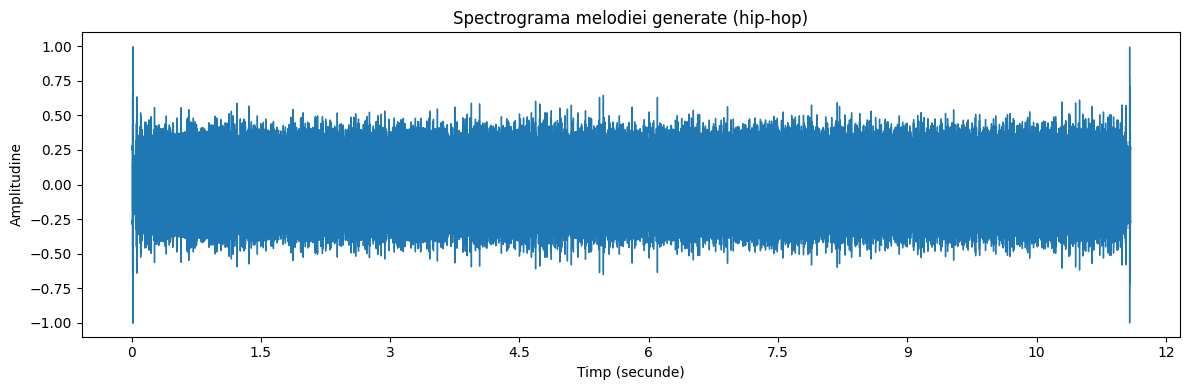

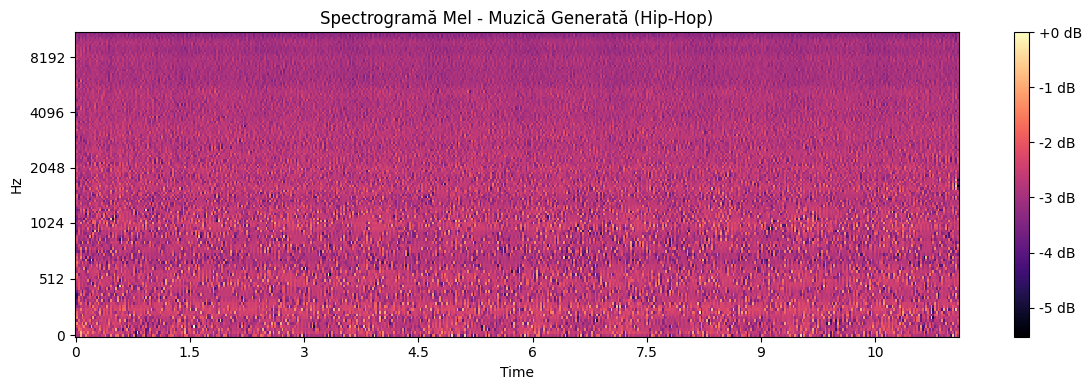

Fisierul brut a fost salvat la: /content/drive/MyDrive/AI_generare_muzica/outputs/muzica_generata_Hip-Hop_brut.wav


In [ ]:
# PASUL 5: Generare MFCC nou folosind modelul generator antrenat

import numpy as np
from tensorflow.keras.models import load_model
import os
import librosa
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display

# Setam directoarele
PROJECT_DIR = '/content/drive/MyDrive/AI_generare_muzica'
MODEL_DIR = os.path.join(PROJECT_DIR, 'models')
OUTPUT_DIR = os.path.join(PROJECT_DIR, 'outputs')

# Incarcam modelul generator deja antrenat
model_generator = load_model(os.path.join(MODEL_DIR, 'music_generator.keras'))

print("Modelul generator a fost incarcat.")

# Parametri
SEQ_LENGTH = 30
NUM_MFCC = 40

# Genurile disponibile
GENURI = ['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock']
NUM_GENRES = len(GENURI)

# Alegem genul muzical
print("Genuri disponibile:")
for i, gen in enumerate(GENURI):
    print(f"{i}: {gen}")

idx_gen = int(input("Alege indexul genului muzical: "))
gen_ales = np.zeros(NUM_GENRES)
gen_ales[idx_gen] = 1

print(f"Genul ales este: {GENURI[idx_gen]}")

# Initializare secventa random
secventa_curenta = np.random.normal(size=(SEQ_LENGTH, NUM_MFCC + NUM_GENRES))
secventa_curenta[:, NUM_MFCC:] = gen_ales

# Generam MFCC-uri
GENERARE_PASI = 500
mfcc_generat = []

for _ in range(GENERARE_PASI):
    secventa_input = np.expand_dims(secventa_curenta[-SEQ_LENGTH:], axis=0)
    mfcc_pred = model_generator.predict(secventa_input, verbose=0)[0]
    pred_full = np.concatenate((mfcc_pred[:NUM_MFCC], gen_ales))
    mfcc_generat.append(mfcc_pred[:NUM_MFCC])
    secventa_curenta = np.vstack([secventa_curenta, pred_full])

mfcc_generat = np.array(mfcc_generat)

print(f"MFCC generat are forma: {mfcc_generat.shape}")

# Transpunem MFCC-ul pentru reconstructie
mfcc_generat_T = mfcc_generat.T

# Convertim MFCC inapoi in spectrograma Mel
mel = librosa.feature.inverse.mfcc_to_mel(mfcc_generat_T, n_mels=128)

# Reconstruim semnal audio
audio_generat = librosa.feature.inverse.mel_to_audio(
    mel,
    sr=22050,
    n_iter=512,
    hop_length=512
)

# Normalizam audio-ul
audio_generat = audio_generat / np.max(np.abs(audio_generat))

# Afisam forma de undă (waveform)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_generat, sr=22050)
plt.title(f"Spectrograma melodiei generate ({GENURI[idx_gen].lower()})")
plt.xlabel("Timp (secunde)")
plt.ylabel("Amplitudine")
plt.tight_layout()
plt.show()

# Afisam spectrograma Mel
plt.figure(figsize=(12, 4))
S_dB = librosa.power_to_db(librosa.feature.melspectrogram(y=audio_generat, sr=22050, n_fft=2048, hop_length=512), ref=np.max)
librosa.display.specshow(S_dB, sr=22050, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Spectrogramă Mel - Muzică Generată ({GENURI[idx_gen]})")
plt.tight_layout()
plt.show()

# Salvam audio-ul brut
os.makedirs(OUTPUT_DIR, exist_ok=True)
audio_path = os.path.join(OUTPUT_DIR, f'muzica_generata_{GENURI[idx_gen]}_brut.wav')
sf.write(audio_path, audio_generat, 22050)

print(f"Fisierul brut a fost salvat la: {audio_path}")

# Redam muzica bruta
ipd.display(ipd.Audio(audio_path))



6.  Aplicam filtrare audio Low-Pass + Smoothing

Filtrare aplicata cu succes.
Fisierul filtrat a fost salvat la: /content/drive/MyDrive/AI_generare_muzica/outputs/muzica_generata_Hip-Hop_filtrata.wav


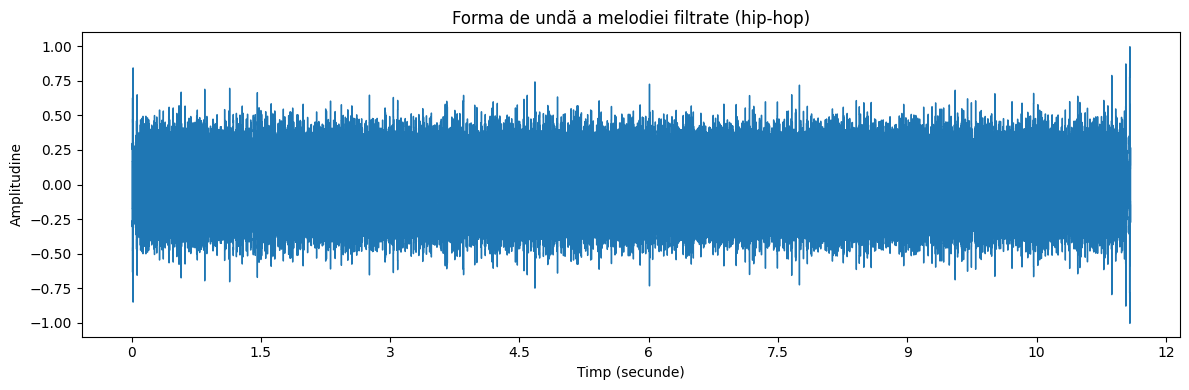

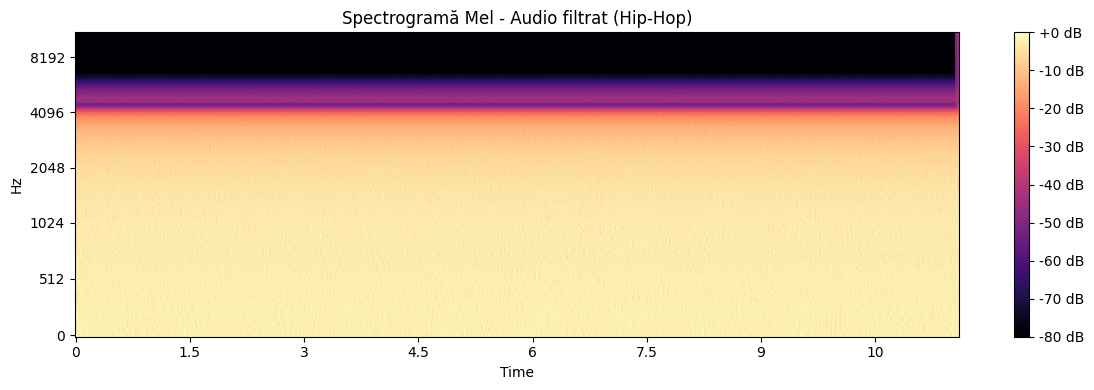

In [ ]:
# PASUL 6: Aplicam filtrare audio Low-Pass + Smoothing
import matplotlib.pyplot as plt
import librosa.display
import scipy.signal

# Functie aplicare Low-Pass Filter
def aplicare_lowpass(audio, cutoff_freq=4000, sample_rate=22050):
    sos = scipy.signal.butter(10, cutoff_freq, 'low', fs=sample_rate, output='sos')
    audio_filtrat = scipy.signal.sosfilt(sos, audio)
    return audio_filtrat

# Functie aplicare Smoothing
def aplicare_smoothing(audio, kernel_size=5):
    kernel = np.ones(kernel_size) / kernel_size
    audio_smooth = np.convolve(audio, kernel, mode='same')
    return audio_smooth

# Aplicam filtre
audio_filtrat = aplicare_lowpass(audio_generat, cutoff_freq=4000)
audio_final = aplicare_smoothing(audio_filtrat, kernel_size=5)

# Normalizam semnalul final
audio_final = audio_final / np.max(np.abs(audio_final))

print("Filtrare aplicata cu succes.")

# Salvam fisierul audio filtrat
audio_path_filtrat = os.path.join(OUTPUT_DIR, f'muzica_generata_{GENURI[idx_gen]}_filtrata.wav')
sf.write(audio_path_filtrat, audio_final, 22050)

print(f"Fisierul filtrat a fost salvat la: {audio_path_filtrat}")

# Redam muzica finala
ipd.display(ipd.Audio(audio_path_filtrat))

# Afisam forma de unda (waveform) pentru audio filtrat
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_final, sr=22050)
plt.title(f"Forma de undă a melodiei filtrate ({GENURI[idx_gen].lower()})")
plt.xlabel("Timp (secunde)")
plt.ylabel("Amplitudine")
plt.tight_layout()
plt.show()

# Afisam spectrograma Mel in dB pentru audio filtrat
plt.figure(figsize=(12, 4))
S = librosa.feature.melspectrogram(y=audio_final, sr=22050, n_fft=2048, hop_length=512)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=22050, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Spectrogramă Mel - Audio filtrat ({GENURI[idx_gen]})")
plt.tight_layout()
plt.show()


Verificare antrenare si PESQ


In [ ]:
pip install pesq matplotlib


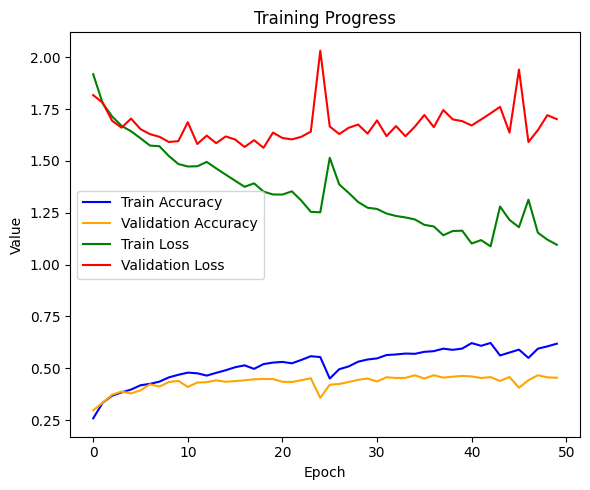

PESQ Score: 2.1367


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pesq import pesq
import soundfile as sf
import librosa

# Incarca istoric real din fisier .npy salvat in Google Drive sau workspace
history = np.load('/content/drive/MyDrive/AI_generare_muzica/models/history_classifier.npy', allow_pickle=True).item()

# Functie pentru afisare grafic
def plot_history(history):
    plt.figure(figsize=(6, 5))
    if 'accuracy' in history:
        plt.plot(history['accuracy'], label='Train Accuracy', color='blue')
    if 'val_accuracy' in history:
        plt.plot(history['val_accuracy'], label='Validation Accuracy', color='orange')
    if 'loss' in history:
        plt.plot(history['loss'], label='Train Loss', color='green')
    if 'val_loss' in history:
        plt.plot(history['val_loss'], label='Validation Loss', color='red')
    plt.title('Training Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.savefig('/content/train_loss_plot.png')  # Salveaza graficul ca imagine
    plt.show()

plot_history(history)

# Seteaza caile catre fisierele audio
audio_path = '/content/drive/MyDrive/AI_generare_muzica/outputs/muzica_generata_Rock_brut.wav'
audio_path_filtrat = '/content/drive/MyDrive/AI_generare_muzica/outputs/muzica_generata_Rock_filtrata.wav'

# Incarca audio brut si filtrat cu resampling la 16000 Hz pentru PESQ
ref_audio, _ = librosa.load(audio_path, sr=16000)
deg_audio, _ = librosa.load(audio_path_filtrat, sr=16000)

# Calculeaza PESQ (wideband)
pesq_score = pesq(16000, ref_audio, deg_audio, 'wb')
print(f"PESQ Score: {pesq_score:.4f}")
